In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler
from sklearn import metrics

%matplotlib inline

In [2]:
sns.set(rc={'figure.figsize':(13, 10)})

pd.pandas.set_option('display.max_columns', None)

In [3]:
bike_data = pd.read_csv('hour.csv', parse_dates=['dteday'])
bike_data.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


In [4]:
bike_data.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


In [5]:
bike_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
instant       17379 non-null int64
dteday        17379 non-null datetime64[ns]
season        17379 non-null int64
yr            17379 non-null int64
mnth          17379 non-null int64
hr            17379 non-null int64
holiday       17379 non-null int64
weekday       17379 non-null int64
workingday    17379 non-null int64
weathersit    17379 non-null int64
temp          17379 non-null float64
atemp         17379 non-null float64
hum           17379 non-null float64
windspeed     17379 non-null float64
casual        17379 non-null int64
registered    17379 non-null int64
cnt           17379 non-null int64
dtypes: datetime64[ns](1), float64(4), int64(12)
memory usage: 2.3 MB


In [6]:
bike_data.shape

(17379, 17)

In [7]:
bike_data.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [8]:
bike_data.duplicated().sum()

0

In [9]:
bike_data.season.value_counts()

3    4496
2    4409
1    4242
4    4232
Name: season, dtype: int64

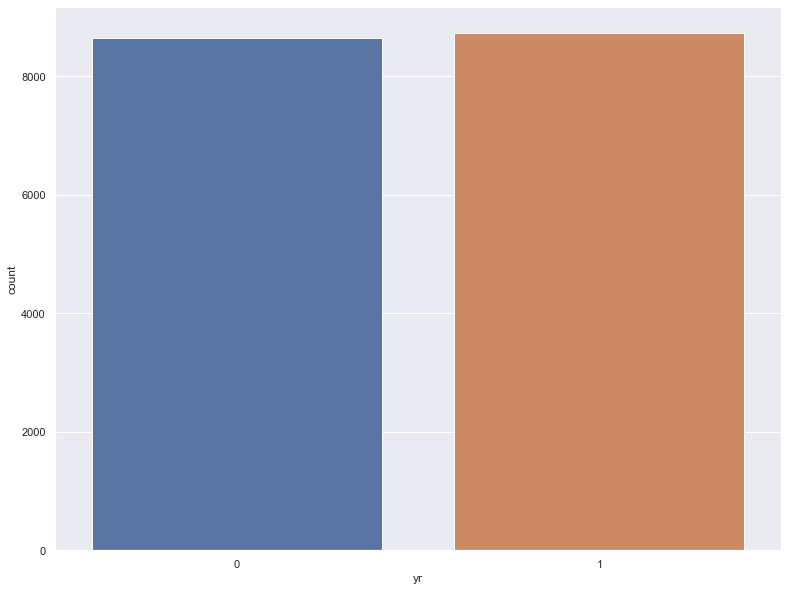

In [10]:
sns.countplot(bike_data['yr'])

# Data Analysis and Preparation

In [11]:
bike_data.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


In [12]:
bike_data.columns

Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'hr', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt'],
      dtype='object')

In [13]:
bike_data['season'].unique()

array([1, 2, 3, 4], dtype=int64)

In [14]:
bike_data['yr'].unique()

array([0, 1], dtype=int64)

In [15]:
bike_data['yr'].value_counts()

1    8734
0    8645
Name: yr, dtype: int64

In [16]:
bike_data['mnth'].unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12], dtype=int64)

In [17]:
bike_data['weekday'].unique()

array([6, 0, 1, 2, 3, 4, 5], dtype=int64)

In [18]:
bike_data['weathersit'].unique()

array([1, 2, 3, 4], dtype=int64)

In [19]:
bike_data['season'] = bike_data['season'].map({1:'Winter', 2:'Spring', 3:'Summer', 4:'Fall'})

bike_data['yr'] = bike_data['yr'].map({0:2011, 1:2012})

bike_data['mnth'] = bike_data['mnth'].map({1:'Jan', 2:'Feb', 3:'Mar', 4:'Apr', 5:'May', 6:'June', 7:'July', 8:'Aug', 9:'Sept', 10:'Oct', 11:'Nov', 12:'Dec'})

bike_data['weekday'] = bike_data['weekday'].map({0:'Sunday', 1:'Monday', 2:'Tuesday', 3:'Wednesday', 4:'Thursday', 5:'Friday', 6:'Saturday'})

bike_data['weathersit'] = bike_data['weathersit'].map({1:'Clear', 2:'Mist', 3:'Light Snow', 4:'Heavy Rain'})

In [20]:
bike_data.sample(5)

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
3122,3123,2011-05-15,Spring,2011,May,0,0,Sunday,0,Mist,0.52,0.5000,1.00,0.0000,5,34,39
8239,8240,2011-12-14,Fall,2011,Dec,23,0,Wednesday,1,Clear,0.32,0.3182,0.70,0.1642,3,48,51
9665,9666,2012-02-12,Winter,2012,Feb,16,0,Sunday,0,Clear,0.20,0.1667,0.34,0.4627,16,148,164
13291,13292,2012-07-13,Summer,2012,July,0,0,Friday,1,Mist,0.70,0.6515,0.54,0.1642,19,76,95
1311,1312,2011-02-27,Winter,2011,Feb,20,0,Sunday,0,Clear,0.40,0.4091,0.54,0.0896,9,72,81


# Data Visualization

In [21]:
bike_data.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,Winter,2011,Jan,0,0,Saturday,0,Clear,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,Winter,2011,Jan,1,0,Saturday,0,Clear,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,Winter,2011,Jan,2,0,Saturday,0,Clear,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,Winter,2011,Jan,3,0,Saturday,0,Clear,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,Winter,2011,Jan,4,0,Saturday,0,Clear,0.24,0.2879,0.75,0.0,0,1,1


In [22]:
bike_data.columns

Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'hr', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt'],
      dtype='object')

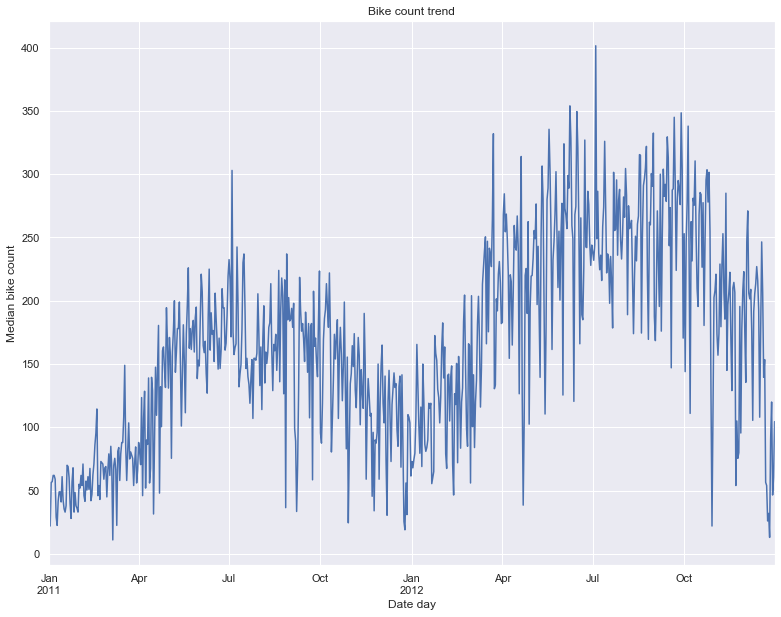

In [23]:
bike_data.groupby('dteday')['cnt'].median().plot.line()
plt.xlabel('Date day')
plt.ylabel('Median bike count')
plt.title('Bike count trend')
plt.show()

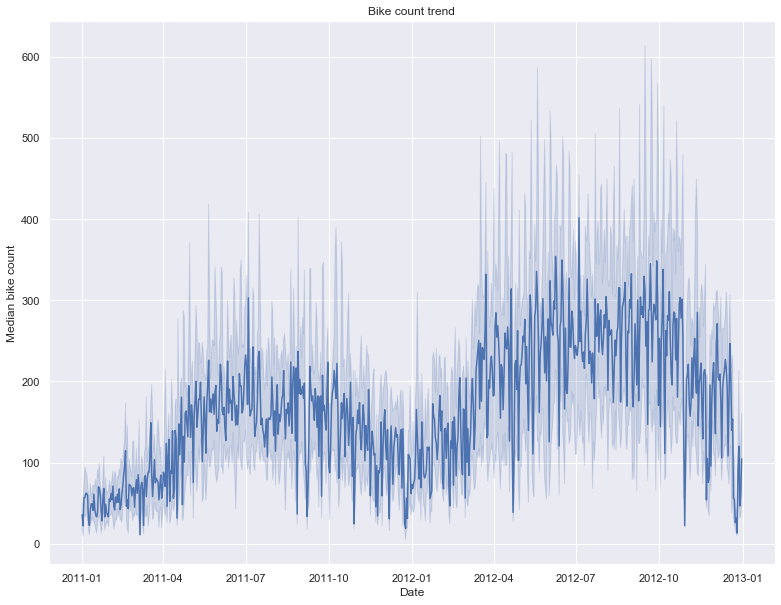

In [24]:
# Seaborn
ax = sns.lineplot(x='dteday', y='cnt', estimator=np.median, data=bike_data)
ax.set(xlabel='Date',
      ylabel='Median bike count',
      title='Bike count trend')
plt.show()

In [25]:
print(sns.__version__)

0.9.0


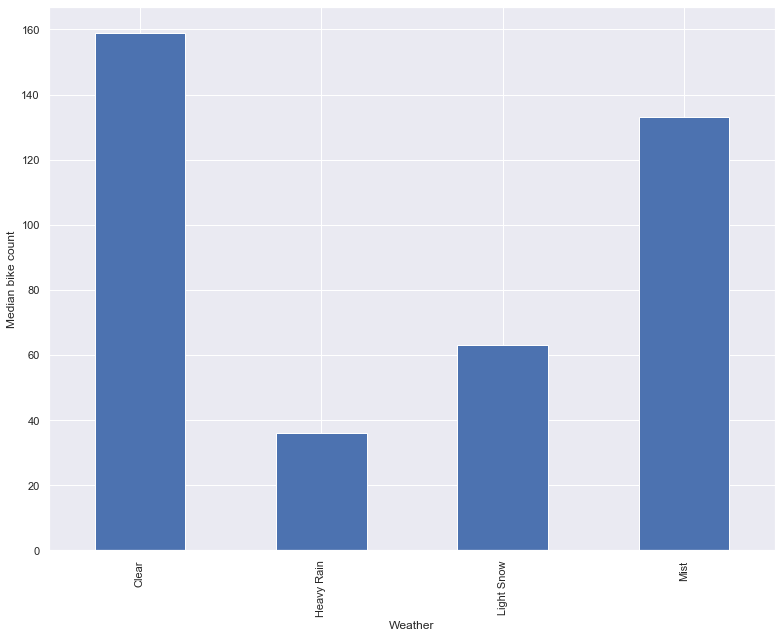

In [26]:
bike_data.groupby('weathersit')['cnt'].median().plot.bar()
plt.xlabel('Weather')
plt.ylabel('Median bike count')
plt.show()

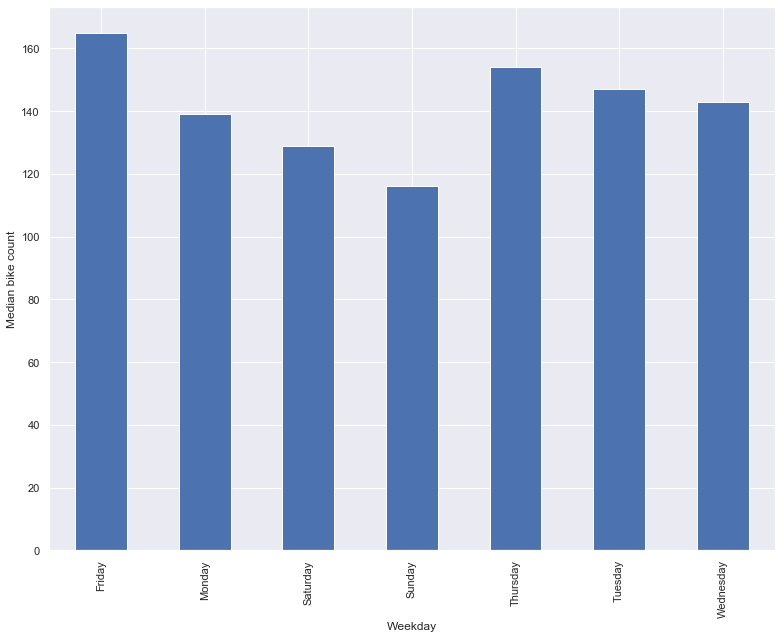

In [27]:
bike_data.groupby('weekday')['cnt'].median().plot.bar()
plt.xlabel('Weekday')
plt.ylabel('Median bike count')
plt.show()

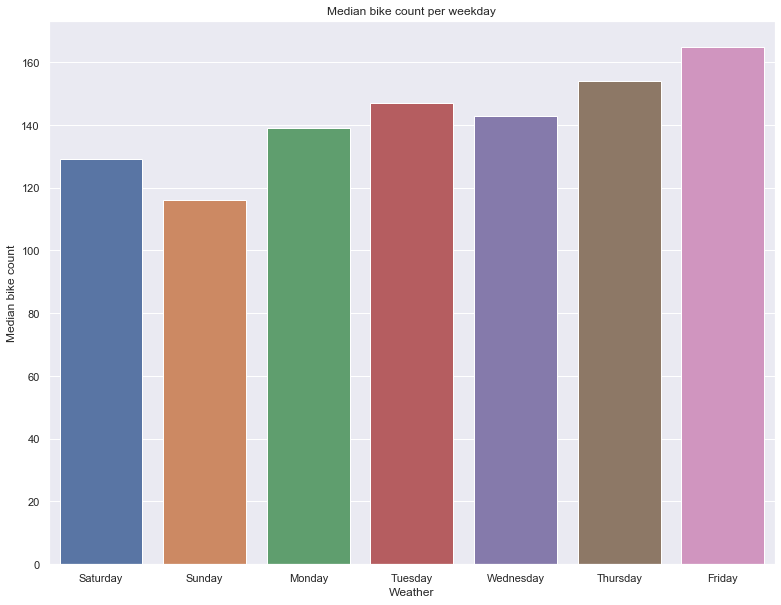

In [28]:
ax = sns.barplot(x = 'weekday', y = 'cnt', data=bike_data, ci=None, estimator=np.median)
ax.set(xlabel='Weather',
      ylabel='Median bike count',
      title='Median bike count per weekday')
plt.show()

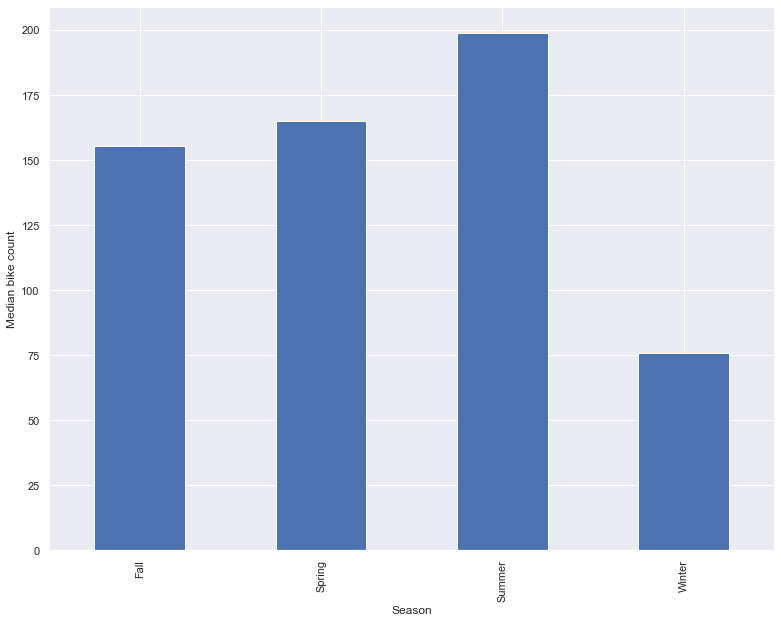

In [29]:
bike_data.groupby('season')['cnt'].median().plot.bar()
plt.xlabel('Season')
plt.ylabel('Median bike count')
plt.show()

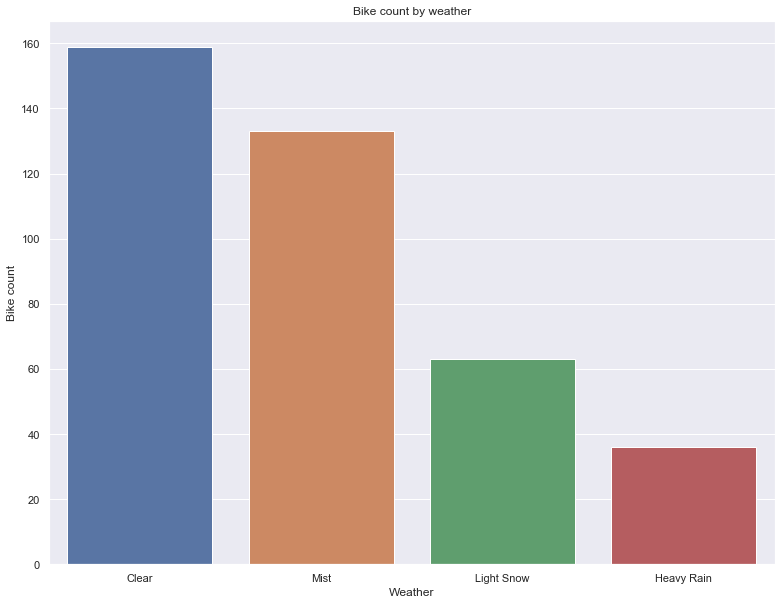

In [30]:
ax = sns.barplot(x='weathersit', y='cnt', data=bike_data, estimator=np.median, ci=None)
ax.set(xlabel='Weather',
      ylabel='Bike count',
      title='Bike count by weather')
plt.show()

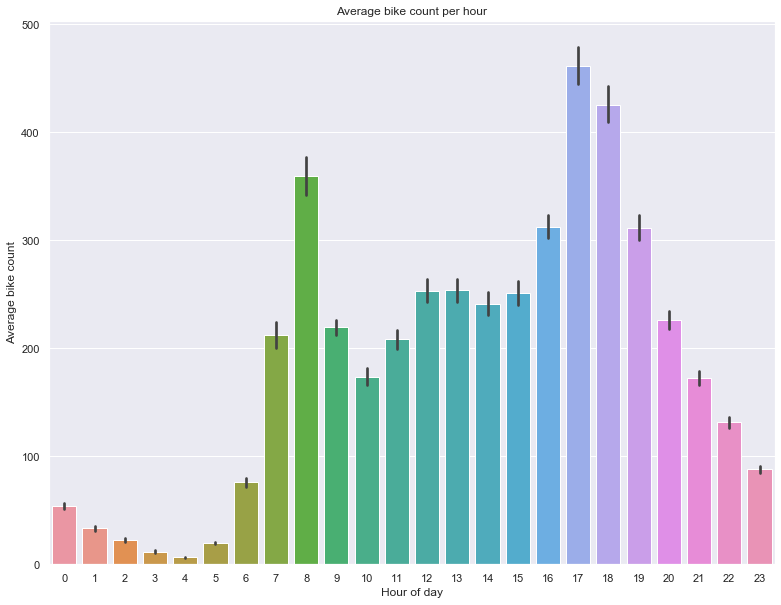

In [31]:
ax = sns.barplot(x='hr', y='cnt', data=bike_data)
ax.set(xlabel='Hour of day',
      ylabel='Average bike count',
      title='Average bike count per hour')
plt.show()

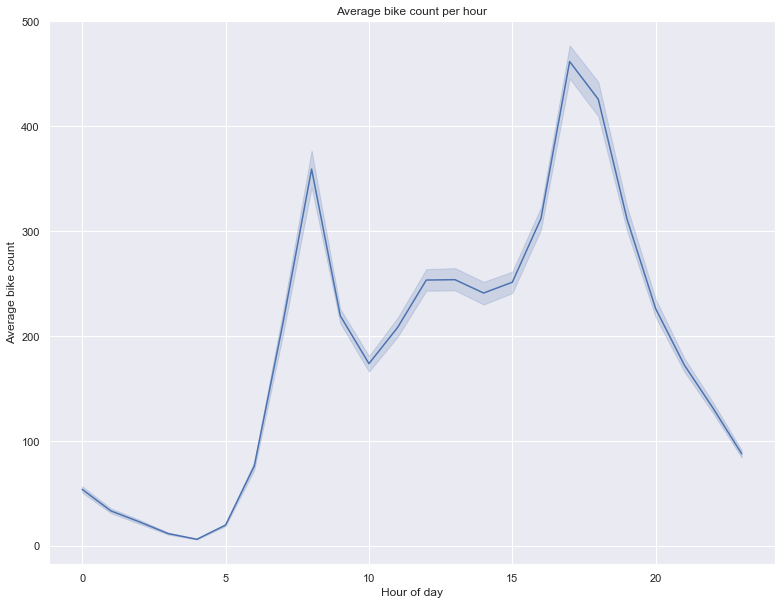

In [32]:
ax=sns.lineplot(x='hr',y='cnt',data=bike_data)
ax.set(xlabel='Hour of day',
       ylabel='Average bike count',
       title='Average bike count per hour')
plt.show()

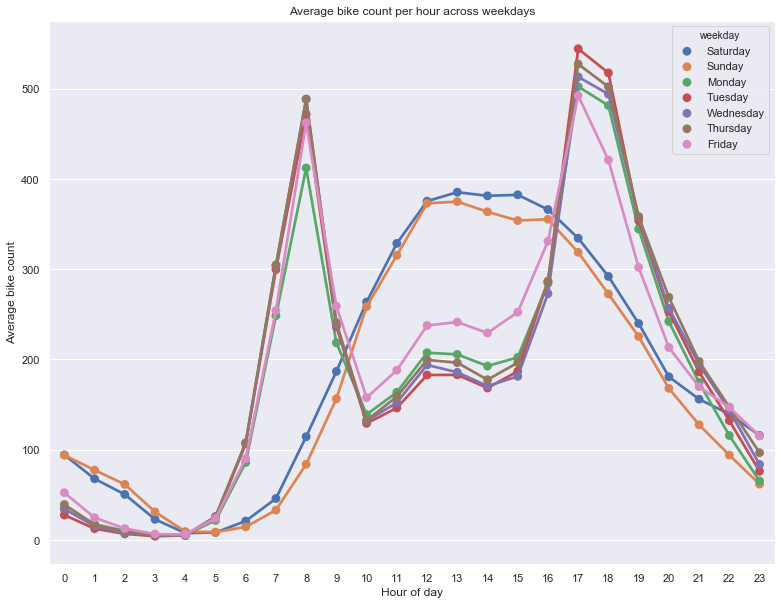

In [33]:
ax = sns.pointplot(x='hr', y='cnt', hue='weekday', ci=None, data=bike_data)
ax.set(xlabel='Hour of day',
      ylabel='Average bike count',
      title='Average bike count per hour across weekdays')
plt.show()

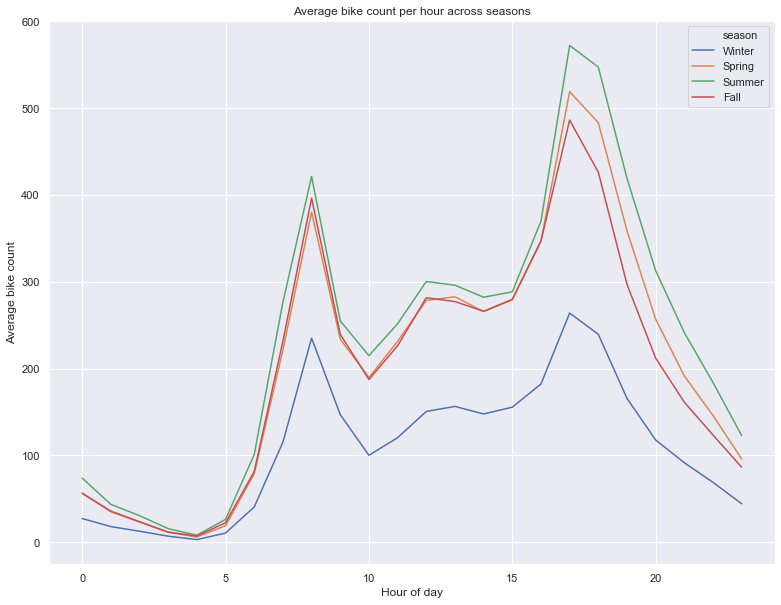

In [34]:
ax = sns.lineplot(x='hr', y='cnt', hue='season', ci=None, data=bike_data)
ax.set(xlabel='Hour of day',
      ylabel='Average bike count',
      title='Average bike count per hour across seasons')
plt.show()

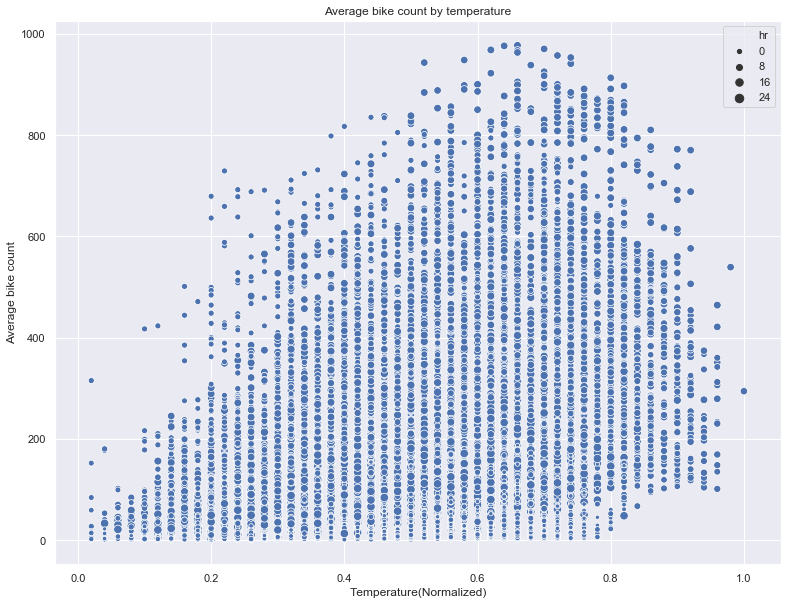

In [35]:
ax = sns.scatterplot(x='temp', y='cnt', size='hr', ci=None, data=bike_data)
ax.set(xlabel='Temperature(Normalized)',
      ylabel='Average bike count',
      title='Average bike count by temperature')
plt.show()

# Feature Engineering

In [36]:
def extract_date(bike_data, column):
    bike_data[column+"_day"] = bike_data[column].apply(lambda x: x.day)
    
extract_date(bike_data, 'dteday')
bike_data.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,dteday_day
0,1,2011-01-01,Winter,2011,Jan,0,0,Saturday,0,Clear,0.24,0.2879,0.81,0.0,3,13,16,1
1,2,2011-01-01,Winter,2011,Jan,1,0,Saturday,0,Clear,0.22,0.2727,0.80,0.0,8,32,40,1
2,3,2011-01-01,Winter,2011,Jan,2,0,Saturday,0,Clear,0.22,0.2727,0.80,0.0,5,27,32,1
3,4,2011-01-01,Winter,2011,Jan,3,0,Saturday,0,Clear,0.24,0.2879,0.75,0.0,3,10,13,1
4,5,2011-01-01,Winter,2011,Jan,4,0,Saturday,0,Clear,0.24,0.2879,0.75,0.0,0,1,1,1


In [37]:
cat_cols = ['season', 'mnth', 'weekday', 'weathersit']

bike_data = pd.get_dummies(bike_data, columns=cat_cols)
bike_data.shape

(17379, 41)

In [38]:
bike_data.head()

,instant,dteday,yr,hr,holiday,workingday,temp,atemp,hum,windspeed,casual,registered,cnt,dteday_day,season_Fall,season_Spring,season_Summer,season_Winter,mnth_Apr,mnth_Aug,mnth_Dec,mnth_Feb,mnth_Jan,mnth_July,mnth_June,mnth_Mar,mnth_May,mnth_Nov,mnth_Oct,mnth_Sept,weekday_Friday,weekday_Monday,weekday_Saturday,weekday_Sunday,weekday_Thursday,weekday_Tuesday,weekday_Wednesday,weathersit_Clear,weathersit_Heavy Rain,weathersit_Light Snow,weathersit_Mist
0,1,2011-01-01,2011,0,0,0,0.24,0.2879,0.81,0.0,3,13,16,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0
1,2,2011-01-01,2011,1,0,0,0.22,0.2727,0.80,0.0,8,32,40,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0
2,3,2011-01-01,2011,2,0,0,0.22,0.2727,0.80,0.0,5,27,32,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0
3,4,2011-01-01,2011,3,0,0,0.24,0.2879,0.75,0.0,3,10,13,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0
4,5,2011-01-01,2011,4,0,0,0.24,0.2879,0.75,0.0,0,1,1,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0


# Feature Selection

In [39]:
bike_data.columns

Index(['instant', 'dteday', 'yr', 'hr', 'holiday', 'workingday', 'temp',
       'atemp', 'hum', 'windspeed', 'casual', 'registered', 'cnt',
       'dteday_day', 'season_Fall', 'season_Spring', 'season_Summer',
       'season_Winter', 'mnth_Apr', 'mnth_Aug', 'mnth_Dec', 'mnth_Feb',
       'mnth_Jan', 'mnth_July', 'mnth_June', 'mnth_Mar', 'mnth_May',
       'mnth_Nov', 'mnth_Oct', 'mnth_Sept', 'weekday_Friday', 'weekday_Monday',
       'weekday_Saturday', 'weekday_Sunday', 'weekday_Thursday',
       'weekday_Tuesday', 'weekday_Wednesday', 'weathersit_Clear',
       'weathersit_Heavy Rain', 'weathersit_Light Snow', 'weathersit_Mist'],
      dtype='object')

In [40]:
ignored_cols = ['casual', 'registered', 'instant', 'dteday', 'cnt', 'atemp']

In [41]:
x = bike_data.drop(columns=ignored_cols)

y = bike_data['cnt']

# Model Development 

In [42]:
x_train, x_test, y_train, y_test = train_test_split(x, y,
                                                   test_size=0.2,
                                                   random_state=7)
x_train.shape, x_test.shape

((13903, 35), (3476, 35))

In [43]:
lr = LinearRegression()

lr.fit(x_train, y_train)

y_pred_lr = lr.predict(x_test)

In [50]:
lr_mae = metrics.mean_absolute_error(y_test, y_pred_lr)
lr_mse = metrics.mean_squared_error(y_test, y_pred_lr)
lr_rmse = np.sqrt(metrics.mean_absolute_error(y_test, y_pred_lr))
lr_r2 = metrics.r2_score(y_test, y_pred_lr)

print('Linear Regression')
print('Mean Absolute Error:', lr_mae)
print('Mean Squared Error:', lr_mse)
print('Root Mean Squared Error:', lr_rmse)
print('R2 Score:', lr_r2)

Linear Regression
Mean Absolute Error: 105.04097812195467
Mean Squared Error: 19772.158294044733
Root Mean Squared Error: 10.248950098520076
R2 Score: 0.3952226634031486


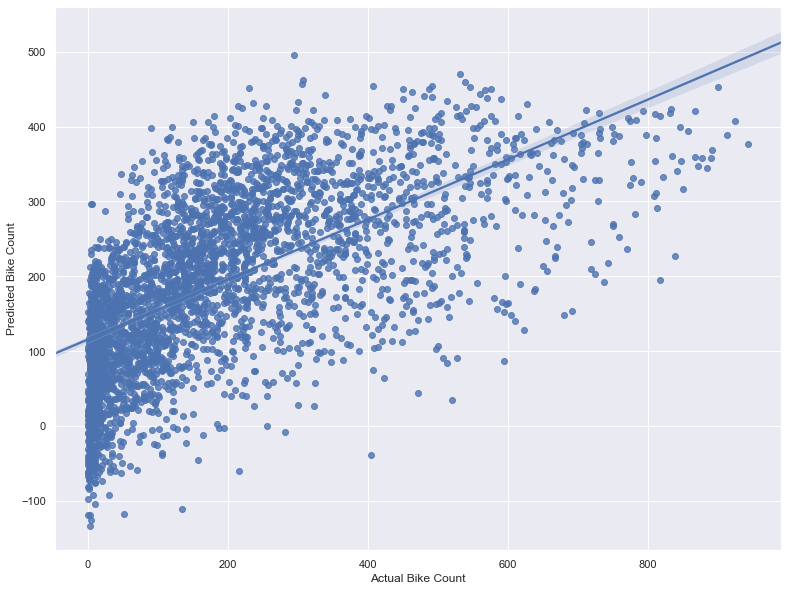

In [51]:
ax = sns.regplot(x=y_test, y=y_pred_lr)
ax.set(xlabel = 'Actual Bike Count',
      ylabel = 'Predicted Bike Count')
plt.show()

In [52]:
dt = DecisionTreeRegressor()

dt.fit(x_train, y_train)

y_pred_dt = dt.predict(x_test)

In [54]:
dt_mae = metrics.mean_absolute_error(y_test, y_pred_dt)
dt_mse = metrics.mean_squared_error(y_test, y_pred_dt)
dt_rmse = np.sqrt(metrics.mean_absolute_error(y_test, y_pred_dt))
dt_r2 = metrics.r2_score(y_test, y_pred_dt)

print('Decision Tree')
print('Mean Absolute Error', dt_mae)
print('Mean Squared Error', dt_mse)
print('Root Mean Squared Error',dt_rmse)
print('R2 Score',dt_r2)

Decision Tree
Mean Absolute Error 34.297180667433835
Mean Squared Error 3425.380609896433
Root Mean Squared Error 5.856379484582077
R2 Score 0.8952267865108274


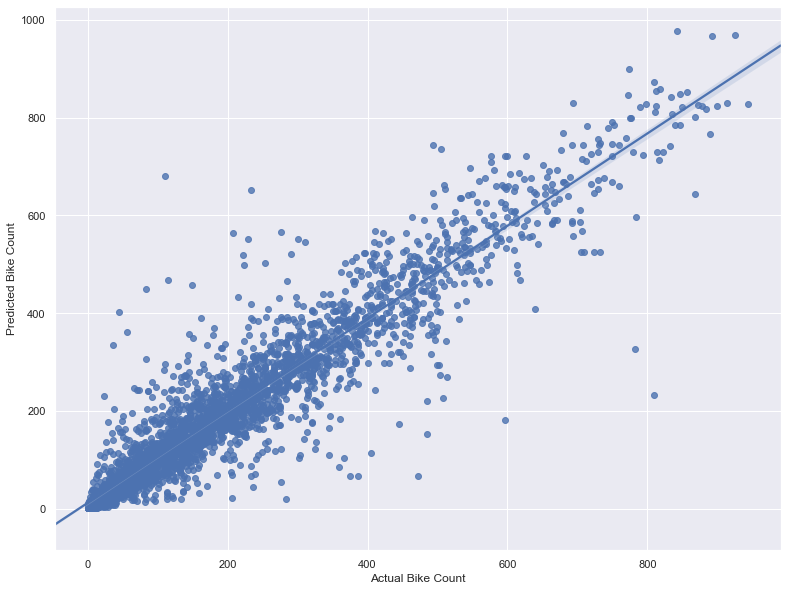

In [55]:
ax = sns.regplot(x = y_test, y = y_pred_dt)
ax.set(xlabel = 'Actual Bike Count',
      ylabel = 'Predicted Bike Count')
plt.show()